In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('UniversalBank.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df=df.drop(['ID','ZIP Code'],axis=1)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [4]:
null_counts = df.isnull().sum()
print(null_counts)

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


In [5]:
summary_stats = df.describe(include='all')
print(summary_stats)

               Age   Experience       Income       Family        CCAvg  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     45.338400    20.104600    73.774200     2.396400     1.937938   
std      11.463166    11.467954    46.033729     1.147663     1.747659   
min      23.000000    -3.000000     8.000000     1.000000     0.000000   
25%      35.000000    10.000000    39.000000     1.000000     0.700000   
50%      45.000000    20.000000    64.000000     2.000000     1.500000   
75%      55.000000    30.000000    98.000000     3.000000     2.500000   
max      67.000000    43.000000   224.000000     4.000000    10.000000   

         Education     Mortgage  Personal Loan  Securities Account  \
count  5000.000000  5000.000000    5000.000000         5000.000000   
mean      1.881000    56.498800       0.096000            0.104400   
std       0.839869   101.713802       0.294621            0.305809   
min       1.000000     0.000000       0.000000       

In [6]:
age_counts = df['Age'].value_counts().reset_index()
age_counts.columns = ['age', 'count']
age_counts['age'].head()

0    35
1    43
2    52
3    54
4    58
Name: age, dtype: int64

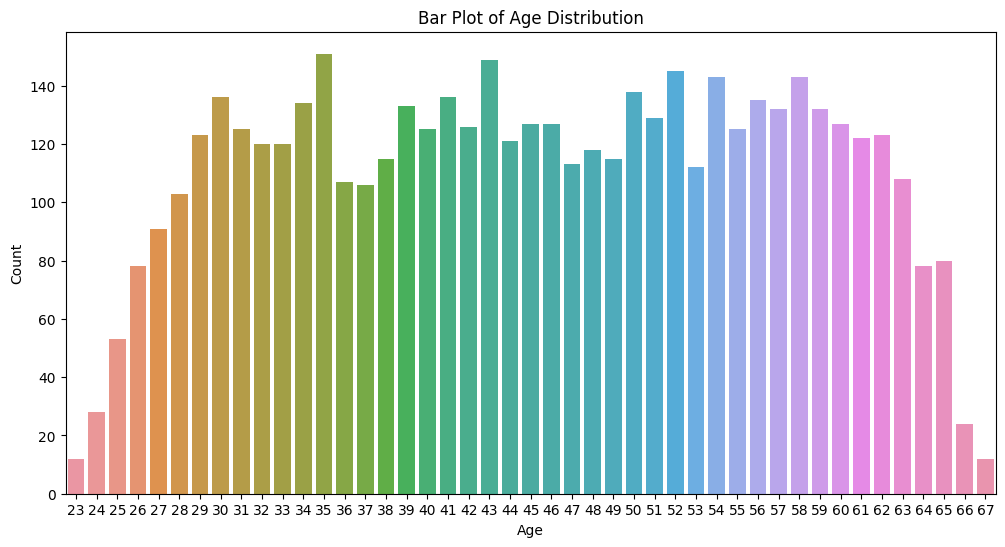

In [7]:
sns.set_palette("colorblind")
plt.figure(figsize=(12, 6))
sns.barplot(x='age', y='count', data=age_counts)


plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Bar Plot of Age Distribution')

plt.show()


In [8]:
personal_loan_counts = df['Personal Loan'].value_counts().reset_index()
personal_loan_counts.columns = ['personal loan', 'count']
personal_loan_counts['personal loan']

0    0
1    1
Name: personal loan, dtype: int64

In [9]:
replacement={0:'Not approved',1:'Approved'}
personal_loan_counts['personal loan'] = personal_loan_counts['personal loan'].replace(replacement)

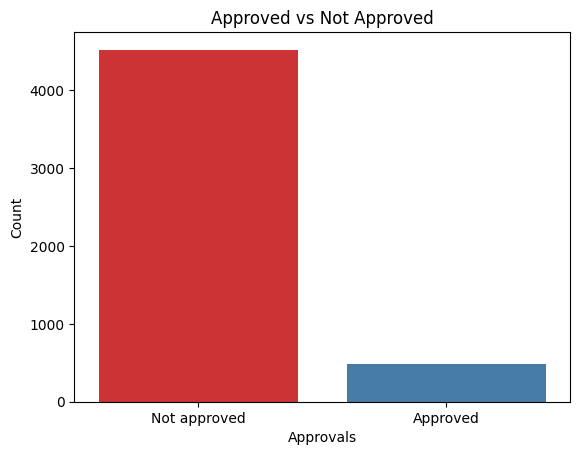

In [10]:
sns.set_palette("Set1")
sns.barplot(x='personal loan', y='count', data=personal_loan_counts)



plt.xlabel('Approvals')
plt.ylabel('Count')
plt.title('Approved vs Not Approved')

plt.show()


The dataset is Biased. There are very few approvals. This can cause problems for ML models as it has very few positive instances to learn from.

In [11]:
personal_loan_counts

,personal loan,count
0,Not approved,4520
1,Approved,480


In [12]:
df['income_per_person']=df['Income']/df['Family']

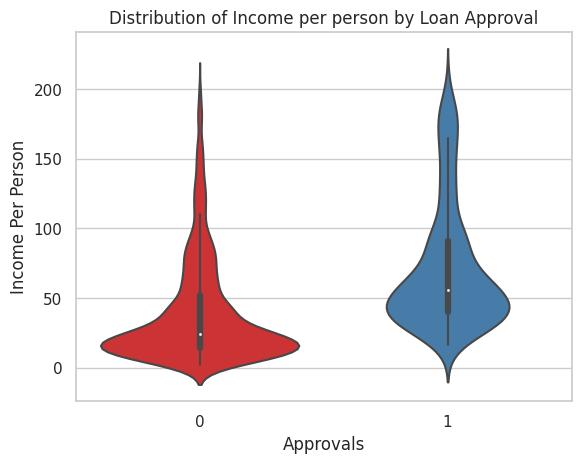

In [13]:
sns.set(style="whitegrid")
sns.set_palette("Set1")
sns.violinplot(x='Personal Loan', y='income_per_person', data=df)


plt.xlabel('Approvals')
plt.ylabel('Income Per Person')
plt.title('Distribution of Income per person by Loan Approval')


plt.show()



In [14]:
age_bins = [0, 35, 55, float("inf")]
age_labels = ['Young', 'Middle Aged', 'Senior Citizen']


df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)


df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,income_per_person,Age Group
0,25,1,49,4,1.6,1,0,0,1,0,0,0,12.250000,Young
1,45,19,34,3,1.5,1,0,0,1,0,0,0,11.333333,Middle Aged
2,39,15,11,1,1.0,1,0,0,0,0,0,0,11.000000,Middle Aged
3,35,9,100,1,2.7,2,0,0,0,0,0,0,100.000000,Young
4,35,8,45,4,1.0,2,0,0,0,0,0,1,11.250000,Young


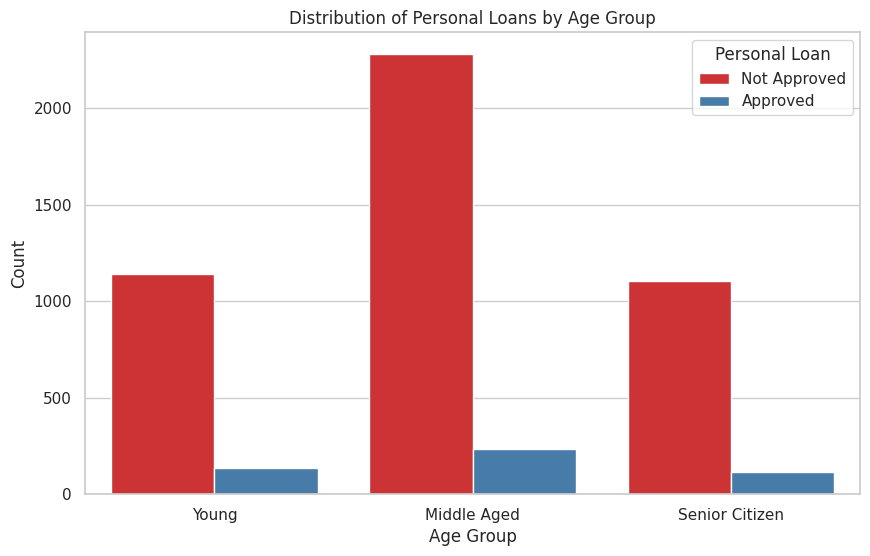

In [15]:
sns.set_palette("Set1")


plt.figure(figsize=(10, 6))
sns.countplot(x='Age Group', hue='Personal Loan', data=df)


plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Personal Loans by Age Group')


plt.legend(title='Personal Loan', labels=['Not Approved', 'Approved'])
plt.show()

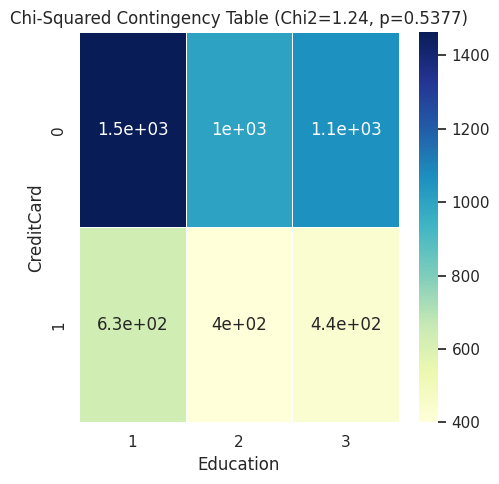

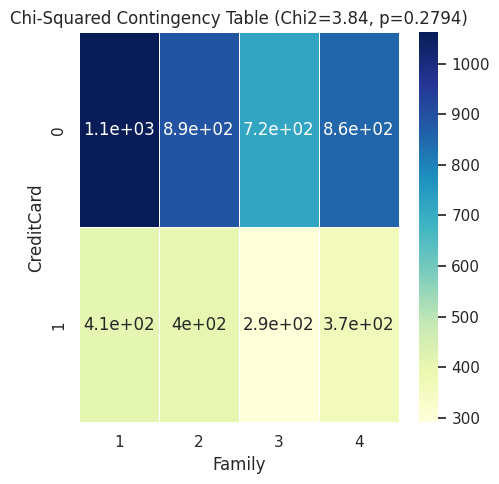

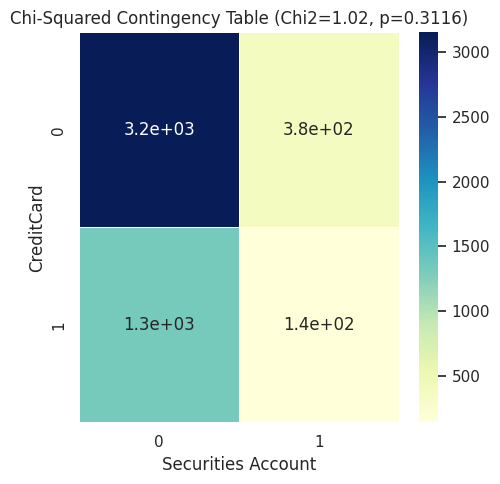

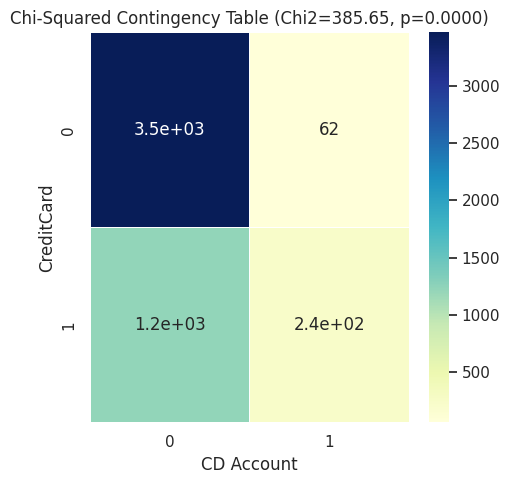

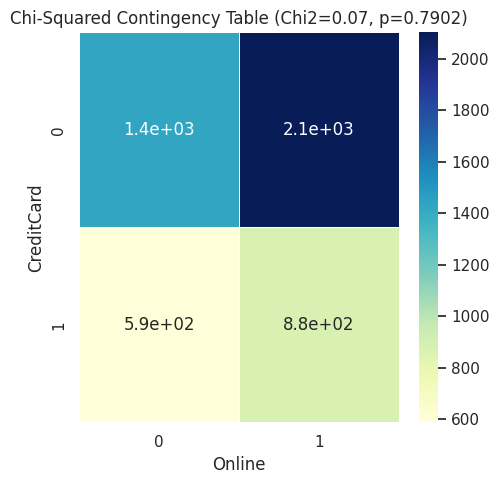

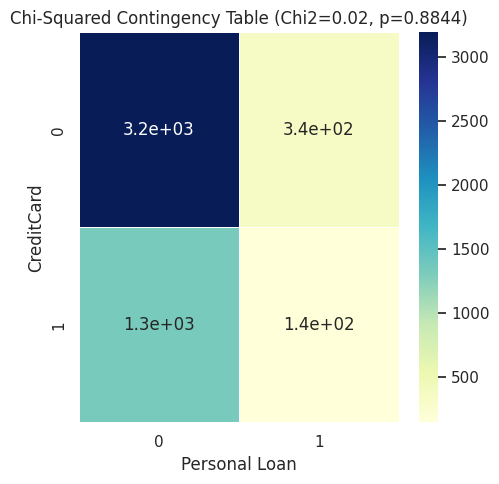

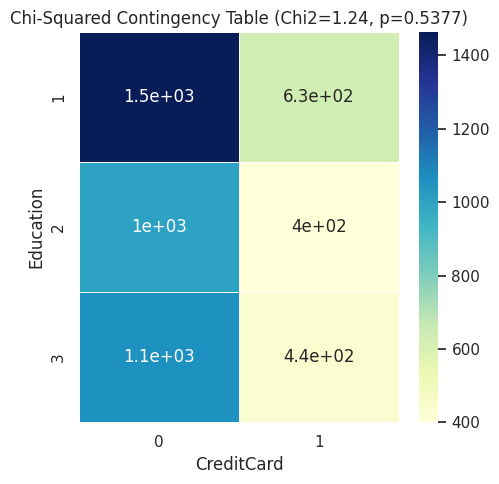

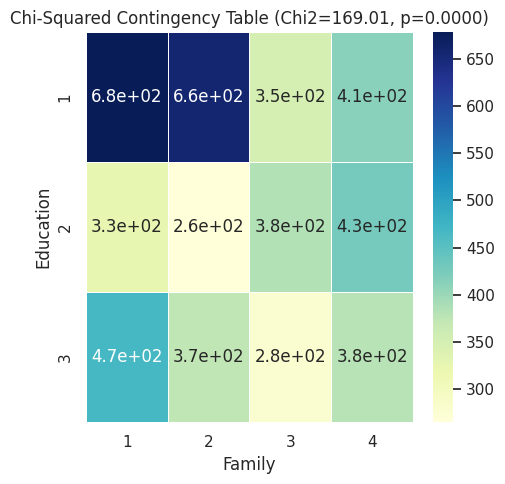

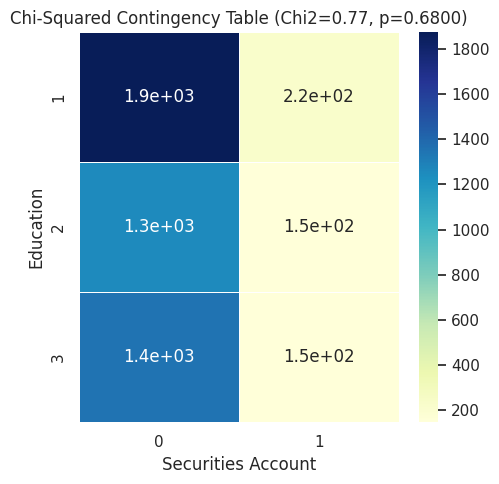

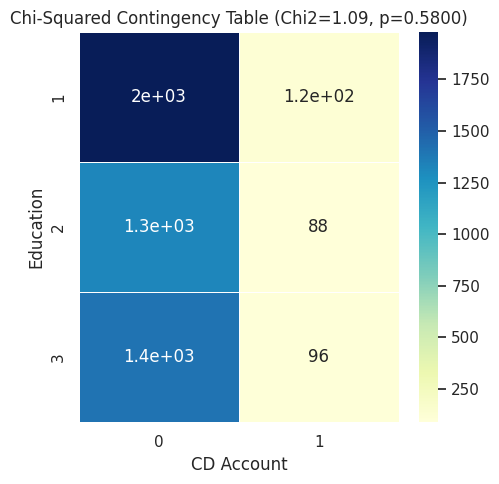

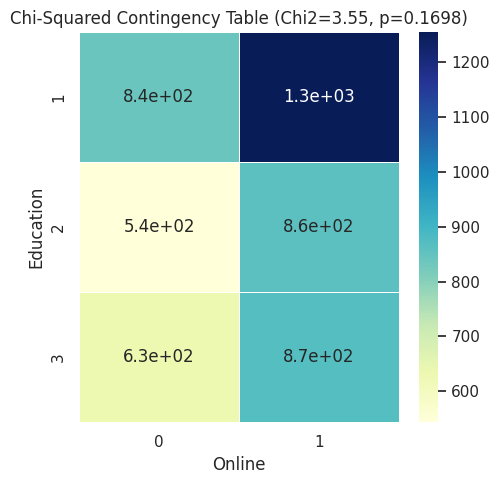

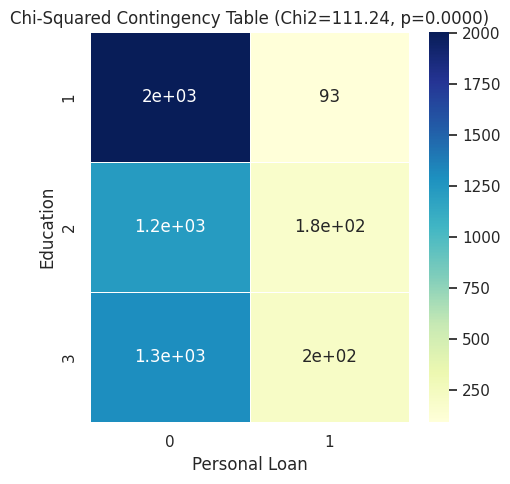

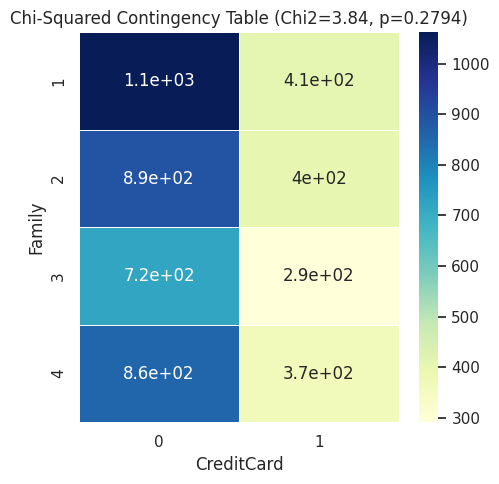

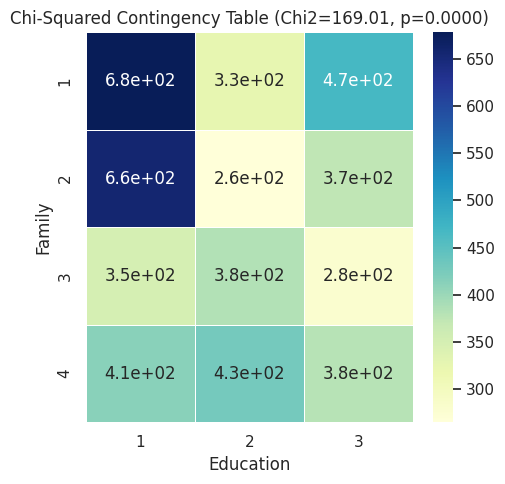

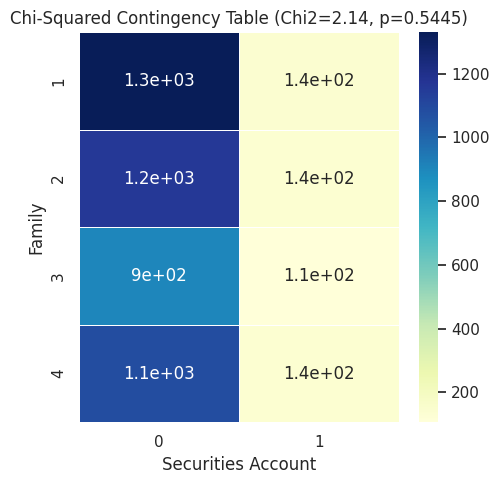

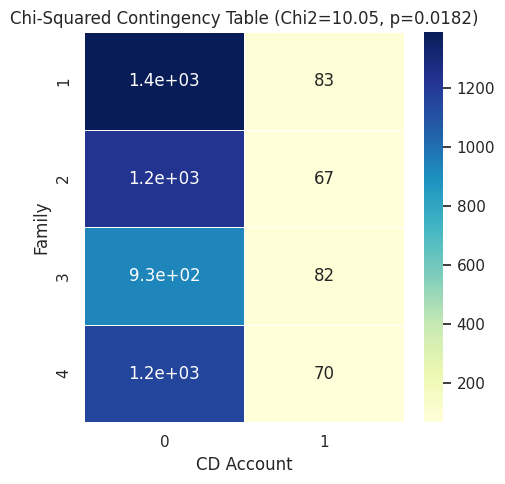

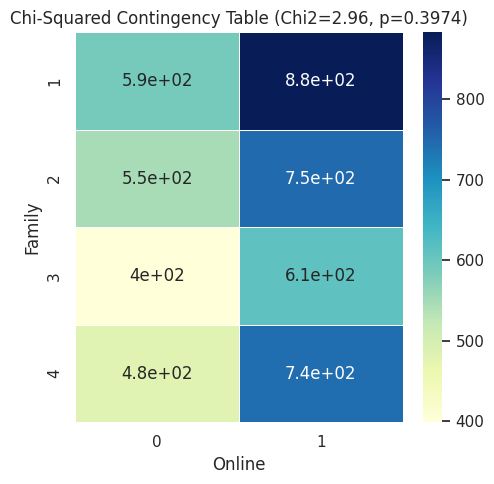

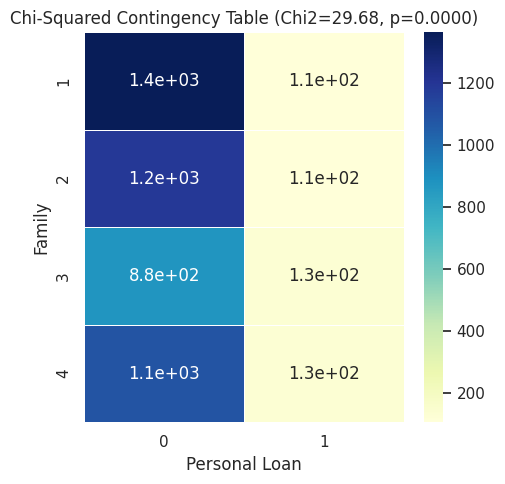

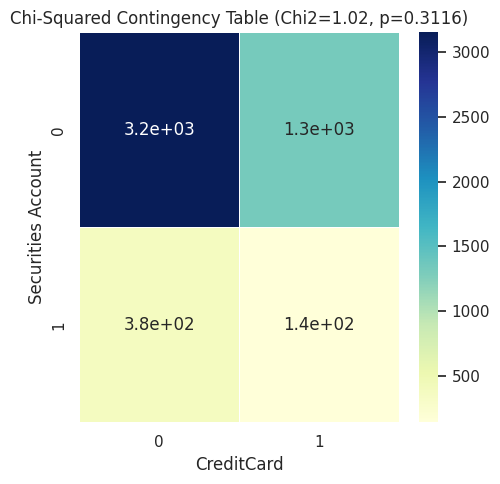

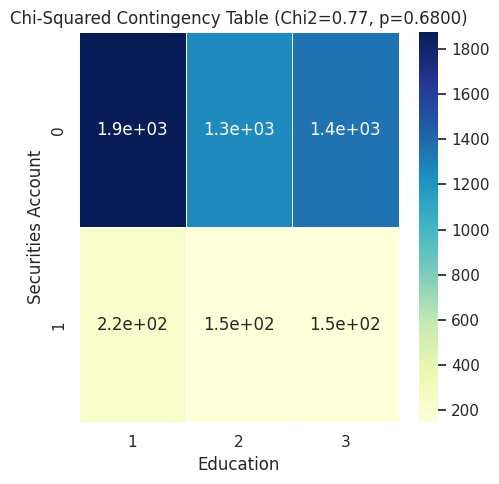

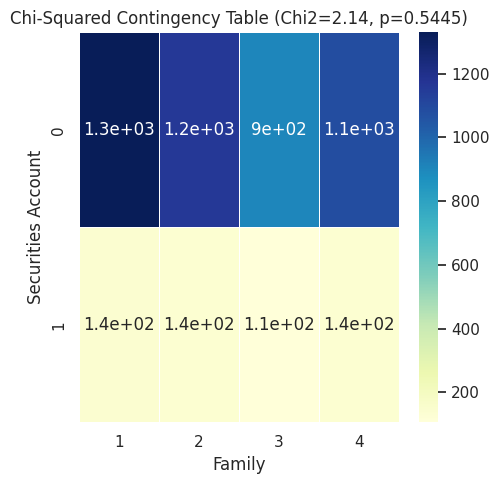

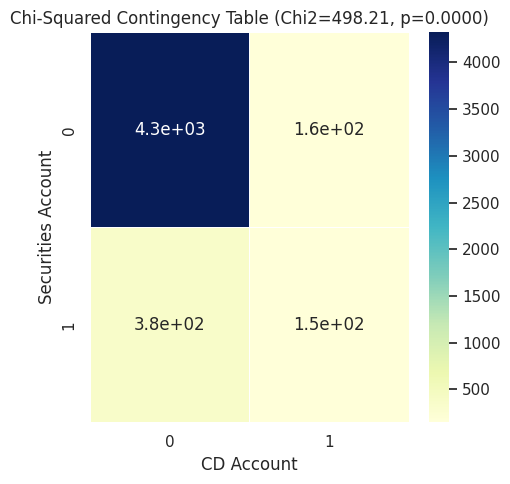

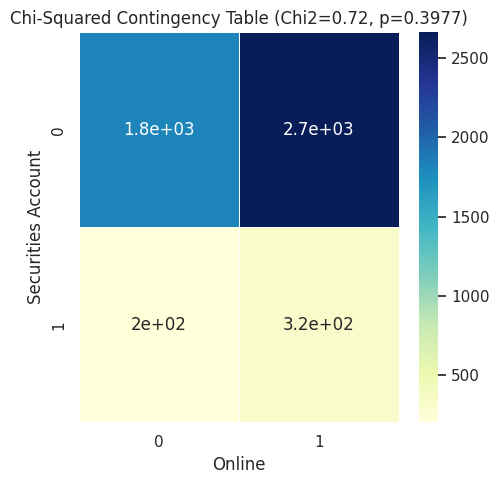

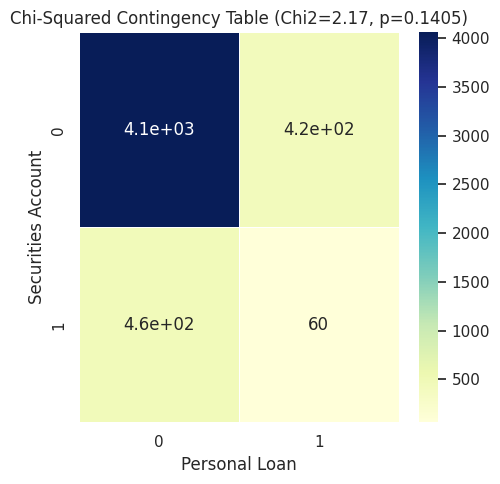

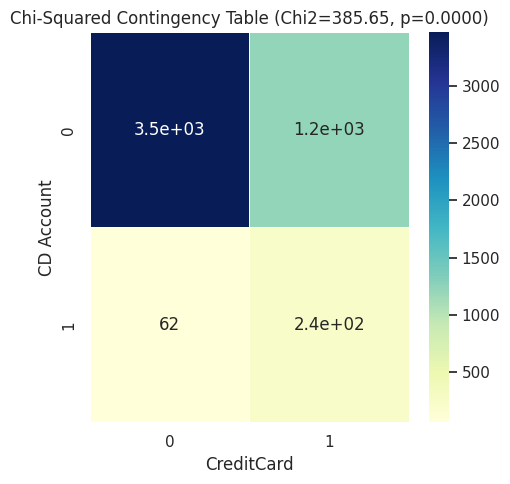

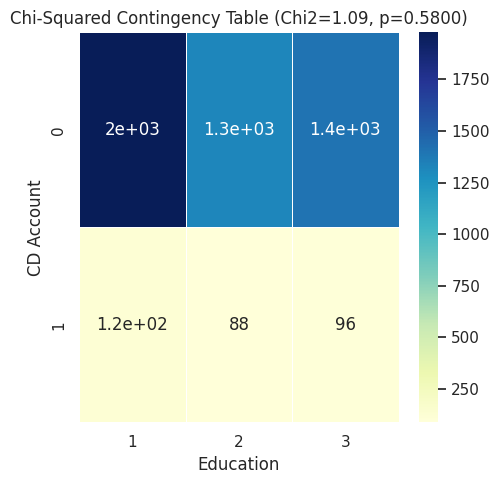

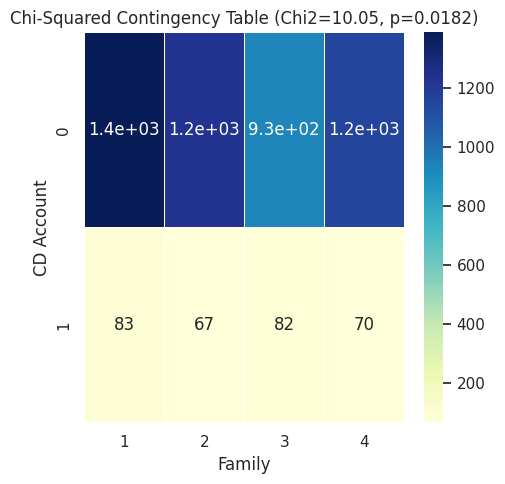

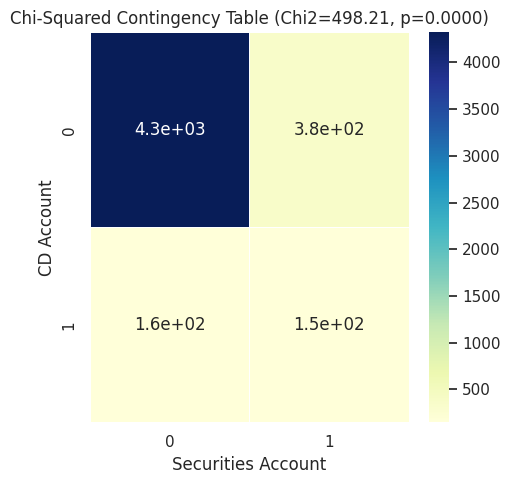

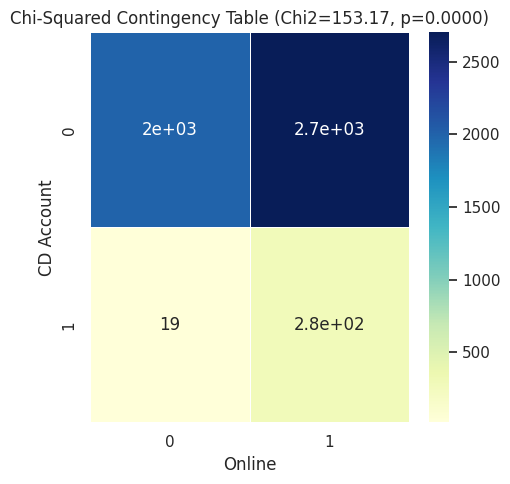

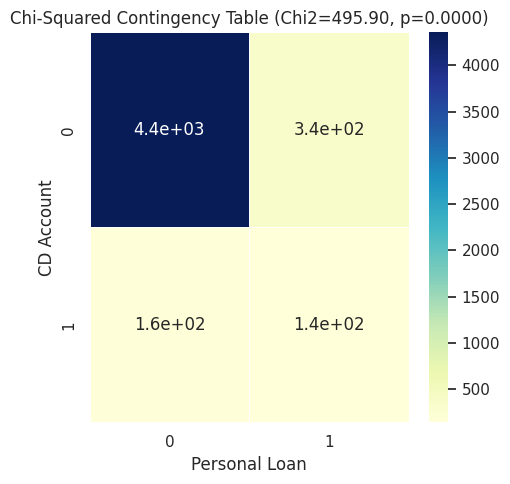

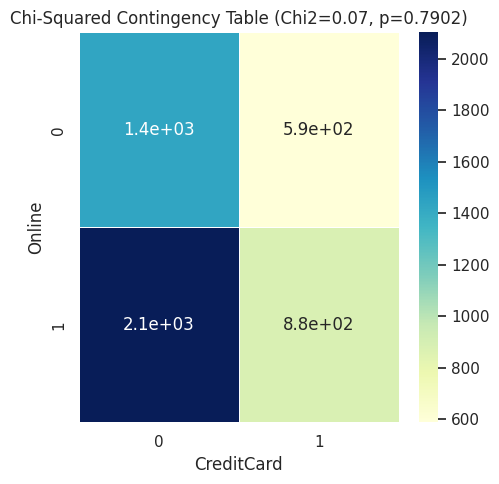

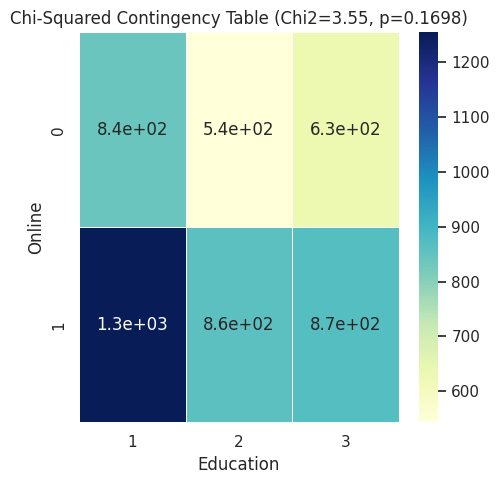

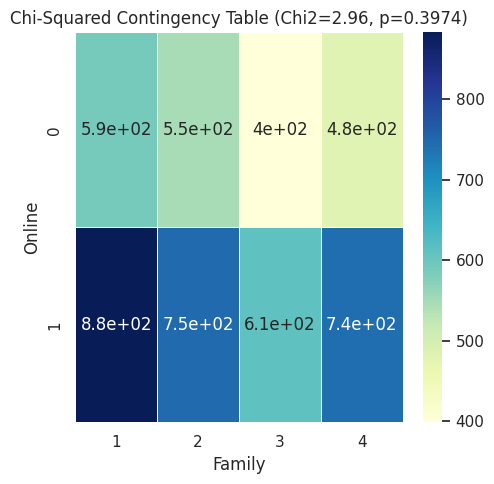

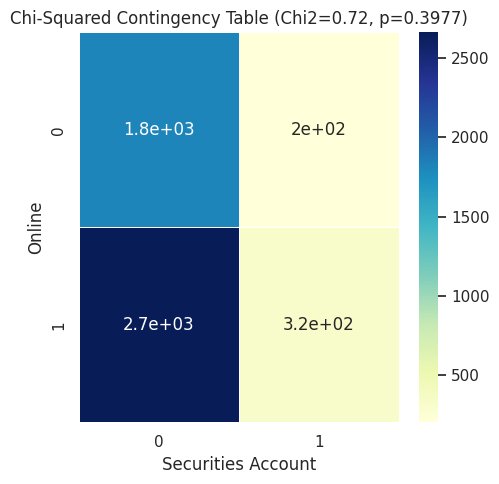

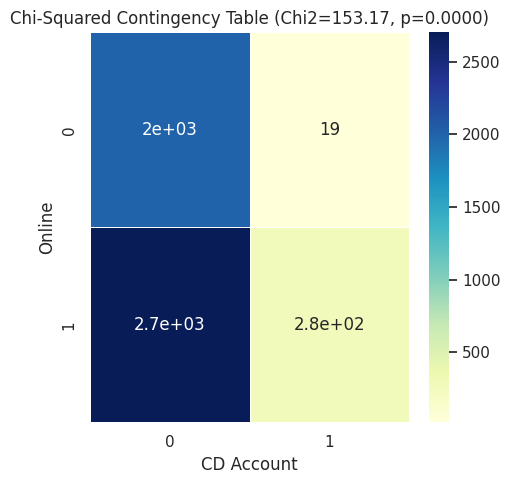

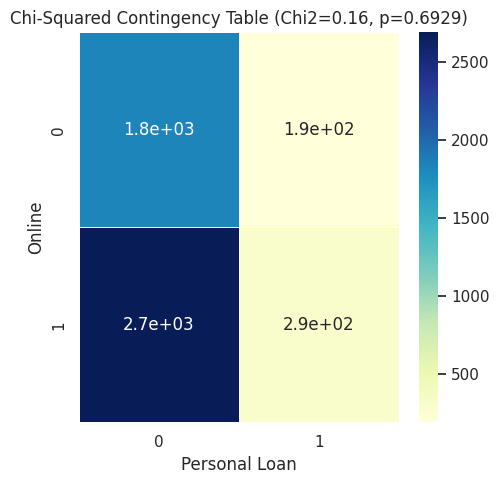

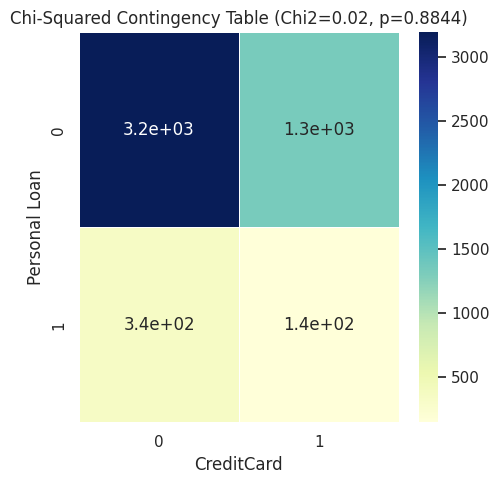

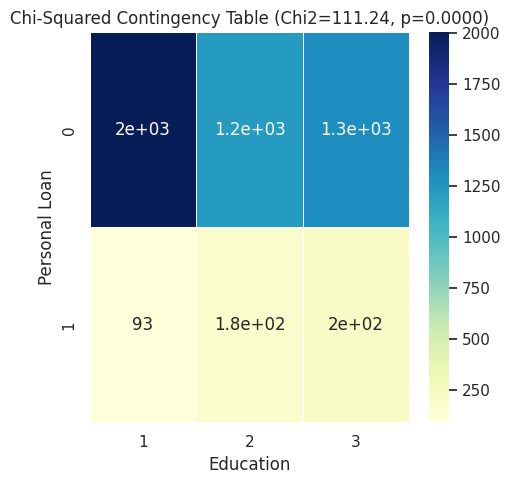

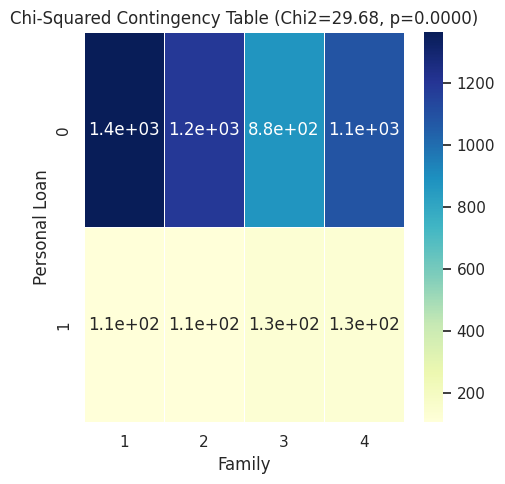

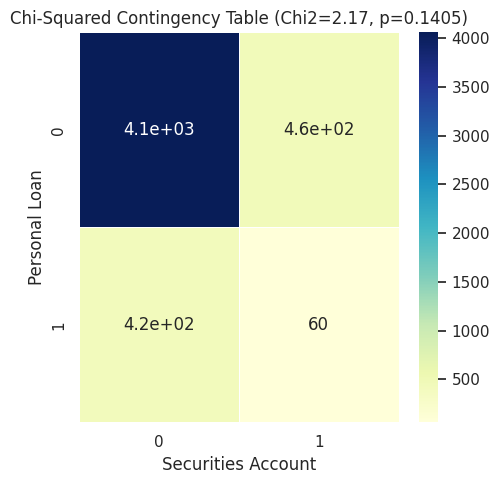

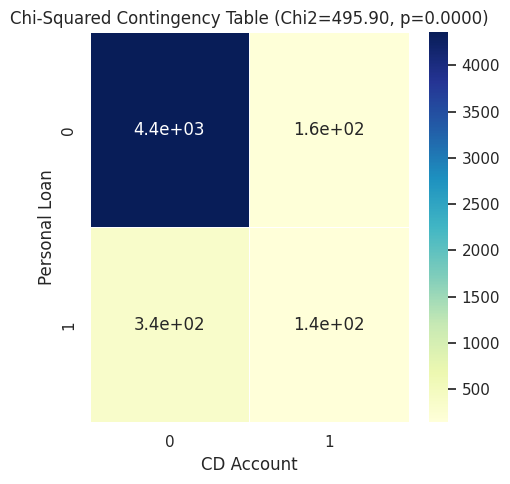

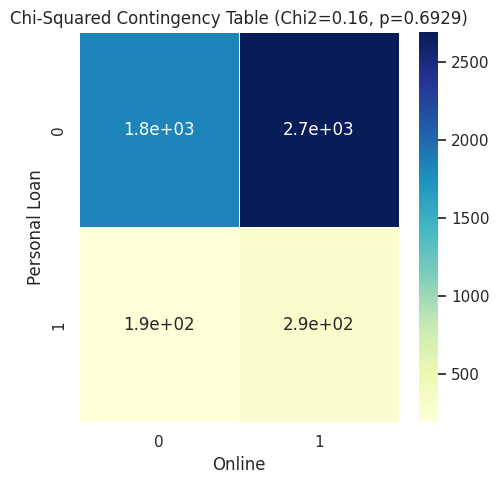

In [16]:
import scipy.stats
categorical_vars = ['CreditCard','Education', 'Family','Securities Account', 'CD Account', 'Online','Personal Loan']

# Calculate chi-square values and p-values for each comparison
for var1 in categorical_vars:
  for var2 in categorical_vars:
    if var1!=var2:
      contingency_table = pd.crosstab(df[var1], df[var2])
      chi2, p, _, _ = scipy.stats.chi2_contingency(contingency_table)


      plt.figure(figsize=(5, 5))
      sns.heatmap(data=contingency_table, annot=True, cmap='YlGnBu', linewidths=0.5)


      plt.xlabel(var2)
      plt.ylabel(var1)
      plt.title(f'Chi-Squared Contingency Table (Chi2={chi2:.2f}, p={p:.4f})')
      plt.tight_layout()

      plt.show()

A contingency table is used to get a heatmap. The heatmap tells us about the correlation that may exist between categorical variables.

The test used here is a chi square test.

Significance level = 0.05

Null Hypothesis:No association between the categorical variables.

Alternate Hypothesis: Significant relationship between the categorical variables.

For p-values indicated for each heatmap, if the the p-value is less than 0.05 then we reject the Null hypothesis.
By rejecting the null hypothesis we say that there is significant association between the pair of variables.



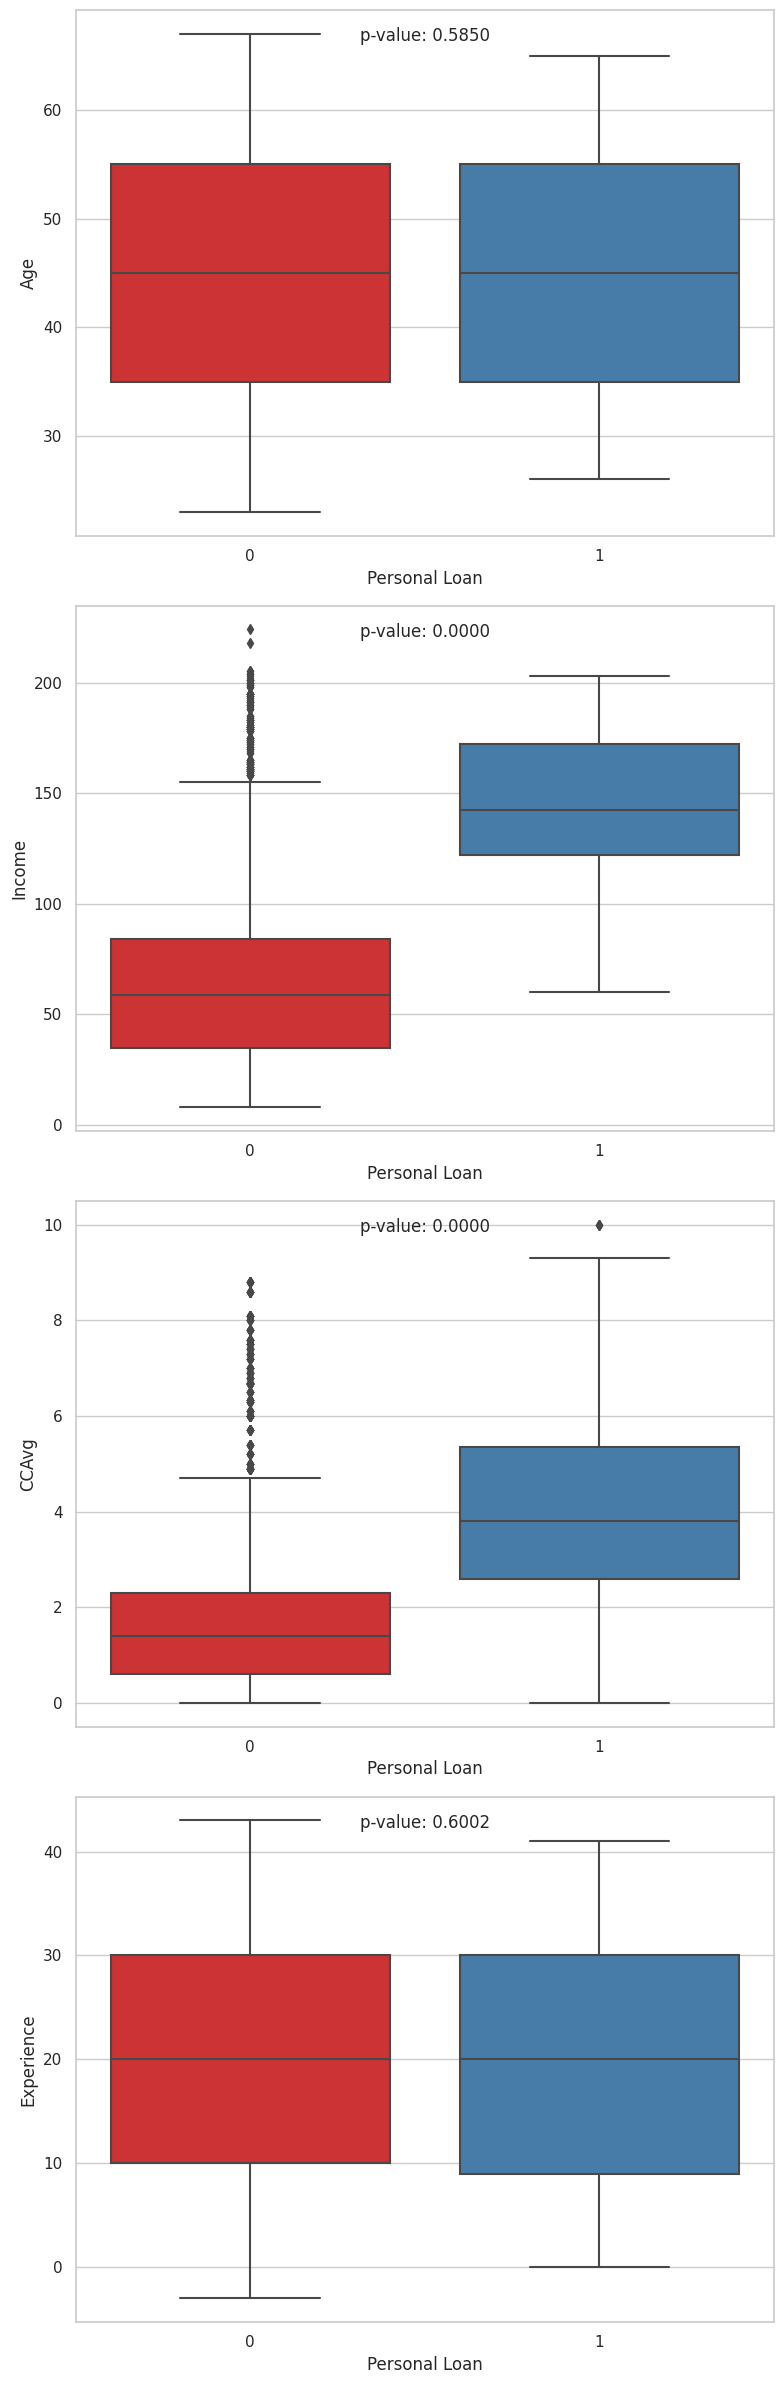

In [17]:
import scipy.stats as stats

# List of continuous variables
continuous_vars = ['Age', 'Income', 'CCAvg', 'Experience']

# Categorical variable
categorical_var = 'Personal Loan'

# Creating subplots
fig, axes = plt.subplots(nrows=len(continuous_vars), ncols=1, figsize=(8, 6 * len(continuous_vars)))

# Performing ANOVA and displaying p-values
for i, var in enumerate(continuous_vars):
    sns.boxplot(x=categorical_var, y=var, data=df, palette='Set1', ax=axes[i])

    # Performing ANOVA
    group_values = [df[var][df[categorical_var] == cat] for cat in df[categorical_var].unique()]
    f_statistic, p_value = stats.f_oneway(*group_values)

    # Adding p-value as text annotation
    axes[i].annotate(f'p-value: {p_value:.4f}', xy=(0.5, 0.95), xycoords='axes fraction', ha='center', va='center')


    axes[i].set_xlabel(categorical_var)
    axes[i].set_ylabel(var)


plt.tight_layout()


plt.show()

Box plots used to find the difference in the summary statitsics of the continuous variable data based on the categorical variable i.e. Personal Loan Approval.

We have used a one-way ANOVA f-test to find if there is significant difference in the mean of groups of continuous variables. The groups of continuous variables are segregated based on the value of the categorical vaariable.

Significance Level: 0.05

Null Hypothesis: There is no difference in means of the different groups.

Alternate Hypothesis: There is difference in means.

We will reject the null hypothesis if the p-value of the pair of variable is less than 0.05. P values are clearly mentioned at the top of each box plot.

Any box-plot with p-value less than 0.05 implies that the means of the groups are different.
Any box-plot with p-value greater than 0.05 implies the means are similar.

The above two points can be considered for statistical modelling.





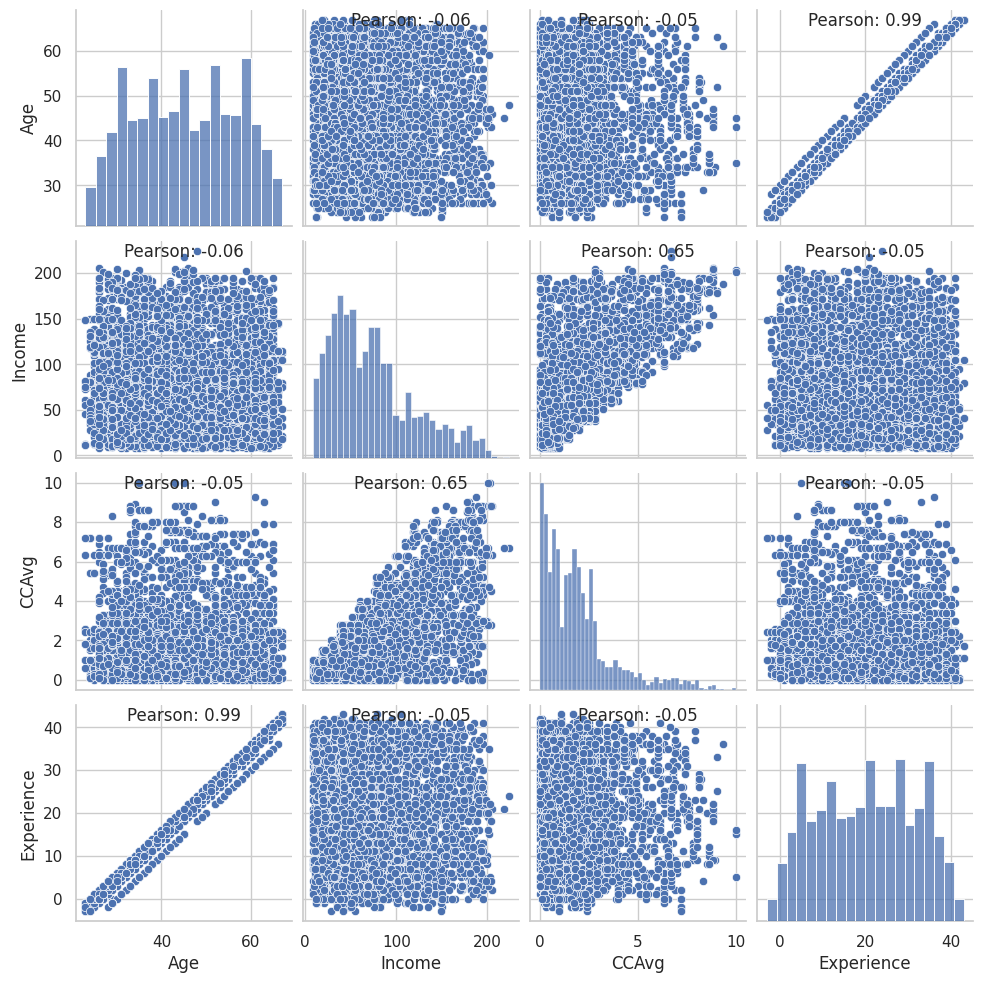

In [18]:
df_continuous=df[['Age','Income', 'CCAvg', 'Experience']]
sns.set_palette("deep")
correlation_matrix = df_continuous.corr()
pairplot = sns.pairplot(df_continuous)


n = len(df_continuous.columns)
for i, var1 in enumerate(df_continuous.columns):
    for j, var2 in enumerate(df_continuous.columns):
        ax = pairplot.axes[j, i]

        if i != j:
            corr_value = correlation_matrix.loc[var1, var2]
            text = f"Pearson: {corr_value:.2f}"
            ax.annotate(text, xy=(0.5, 0.95), xycoords='axes fraction', ha='center', va='center')


plt.show()

Scatterplots have been used to analyse the correlation between continuous variables.
The pearson correlation coefficient has been used to understand the strength and direction of the correlation between any two pairs of relationships.

A pearson correlation value of greater than 0 is positive correlation.
A pearson correlation value of less than 0 is negative correlation.
A pearson correlation value of 0 or around 0 means no correlation.

Higher negative or positive value of pearson correlation implies there is strong association/correlation between the variables.

Useful in model building process.